In [1]:
from trep import TREP
import matplotlib.pyplot as plt
import os

 C:\Users\s.risch\git\fine\FINE\IOManagement\standardIO.py:13: UserWarning:The GeoPandas python package could not be imported.
 C:\Users\s.risch\git\fine\FINE\expansionModules\robustPipelineSizing.py:34: UserWarning:The GeoPandas python package could not be imported.


Working on DEG0F
A
                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 1.579e+05
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:32:07   Log-Likelihood:                -93823.
No. Observations:               24465   AIC:                         1.876e+05
Df Residuals:                   24463   BIC:                         1.877e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.5844      0.2

 C:\Users\s.risch\git\TREP\TREP\openfield_pv.py:187: UserWarning:For federal state thueringen only existing plants from mastr are available 
 C:\Users\s.risch\git\TREP\TREP\openfield_pv.py:187: UserWarning:For federal state thueringen only existing plants from mastr are available 
 C:\Users\s.risch\git\TREP\TREP\openfield_pv.py:187: UserWarning:For federal state thueringen only existing plants from mastr are available 


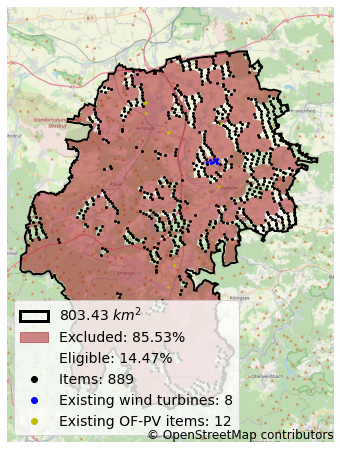

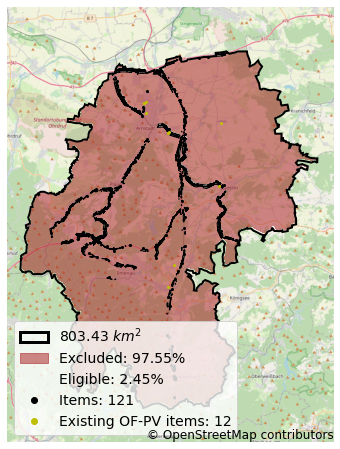

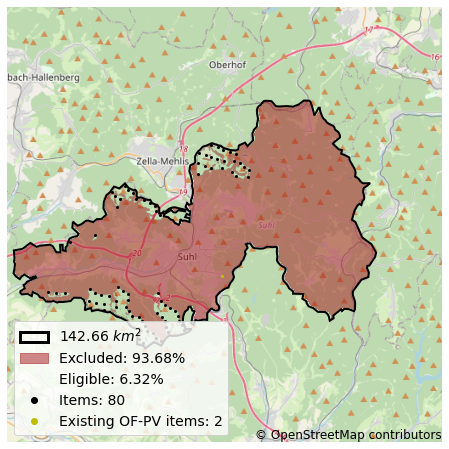

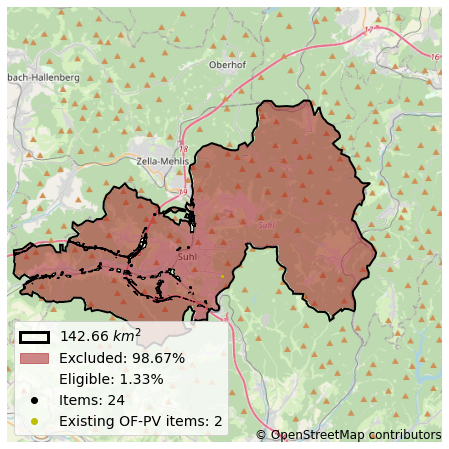

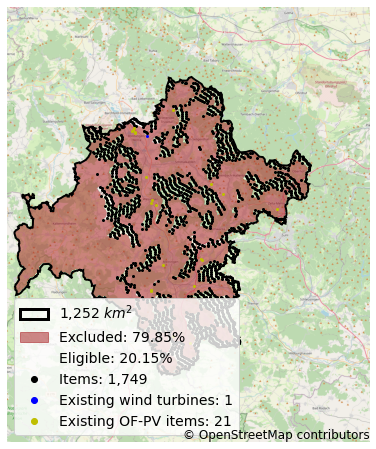

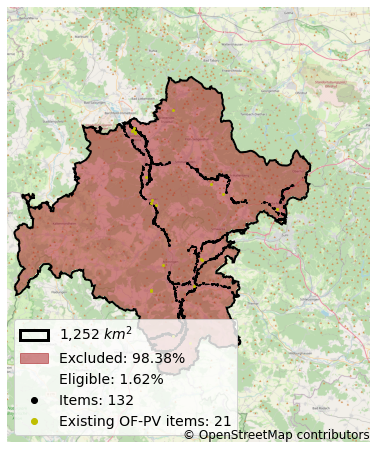

In [2]:
for i, reg in enumerate(['DEG0F', 'DEG04', 'DEG0B']):
    print("Working on {}".format(reg), flush=True)
    glr = TREP(reg, level="nuts3", case="KWK40_test_hybrid")
    glr.Wind.get_existing_plants(ec=glr.Wind.ec, mastr=False)
    glr.OpenfieldPV.get_existing_plants(ec=glr.Wind.ec, mastr=False)
    glr.Wind.get_existing_plants(ec=glr.OpenfieldPVRoads.ec, mastr=False)
    glr.OpenfieldPV.get_existing_plants(ec=glr.OpenfieldPVRoads.ec, mastr=False)
    glr.Wind.estimate_potential(predict=False)
    glr.estimate_hybrid_potential()
    glr.OpenfieldPVRoads.estimate_potential(predict=False)
    glr.Wind.distance = [8, 3]
    glr.estimate_shared_potential(techs=["Wind", "OpenfieldPVRoads"])
    glr.Wind.ec.drawWithSmopyBasemap(zoom=11)
    plt.savefig(os.path.join(glr.db_path, glr.case, "Wind_{}.png".format(glr.id)))
    glr.OpenfieldPVRoads.ec.drawWithSmopyBasemap(zoom=11)
    plt.savefig(os.path.join(glr.db_path, glr.case, "OpenfieldPVRoads_{}.png".format(glr.id)))
    glr.to_db("Wind")
    glr.existing_to_db("Wind")
    glr.to_db("OpenfieldPV")
    glr.existing_to_db("OpenfieldPV")
    glr.to_db("OpenfieldPVRoads")
    glr.existing_to_db("OpenfieldPV")

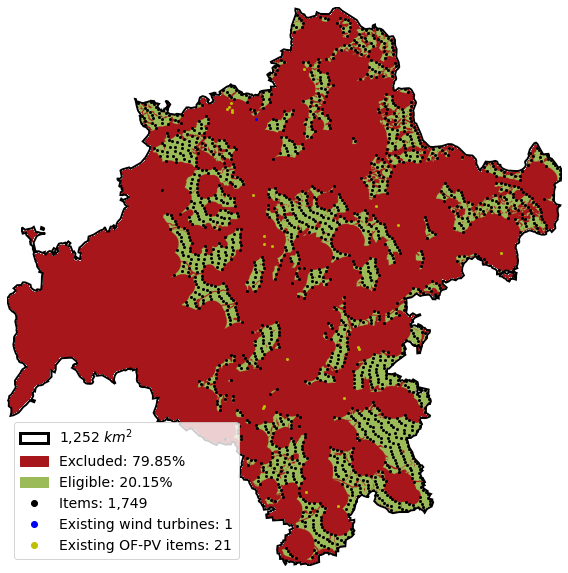

In [3]:
glr.Wind.ec.draw()

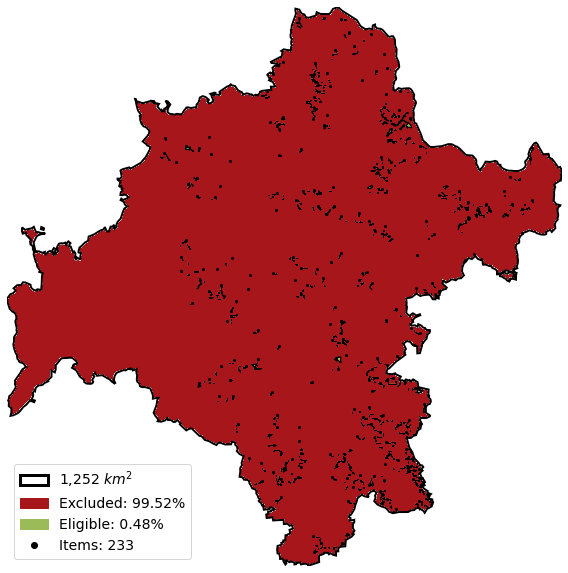

In [4]:
glr.OpenfieldPV.ec.draw()

In [5]:
glr.OpenfieldPV.predicted_items.capacity.sum() / 1e6

0.6712022135851853